Logistic Regression
===================

Logistic regression is a classification technique where the dependent variable $y$ is categorical (i.e. a discrete set of possible values rather than an infinite amount of numerical values like in linear regression). The binary logistic model is used to predict a binary (1 or 0) response based on one or more predictors (aka independent variables, aka features). In this practical, we will study how to implement logistic regression models with scikit-learn.

Recall that logistic regression uses the sigmoid function to model the data. In a binary classification problem, any data point whose probability is determined to be larger than 0.5 (50%) by the model (i.e. sigmoid function) will be assigned the label 1, any data points whose probability is determined to be below 0.5 will be assigned the label 0.

Logistic regression is about finding the optimal parameters $\theta_0$ and $\theta_1$ of the sigmoid function $p(x)=g(x)= \frac{1}{1 + e^{-(\theta_0+\theta_1 x)}}$ that better classifies the data. Different values of those parameters change the model (and therefore its predictions). Convince yourself that this is the case by changing the values of $\theta_0$ and $\theta_1$ in the code snippet below and observing their impact on the model:

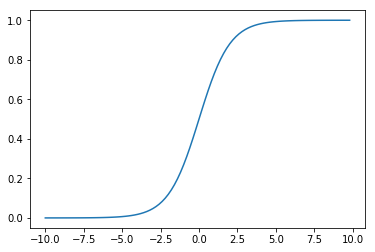

In [1]:
%matplotlib inline 
import math

theta0=0 
theta1=1

def sigmoid(x,t0,t1):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-(t0+t1*item))))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x,theta0,theta1)
plt.plot(x,sig)
plt.show()

Next, I suggest you open up the Spyder IDE. Let's generate some artificial data to train a logistic regression model with. In the following code, the function `make_blobs` simply generates 100 random artificial data points (as specified by the `n_samples` argument) with `n_features` and each data point belonging to one of 2 different classes (the centers argument). The argument `cluster_std` specifies the spread of the data around each cluster.

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.7,random_state=1)#generate dataset consisting of two Gaussian clusters

Take a look at how large the data is and what the labels look like:

In [3]:
print("X.shape:", X.shape)
print("y: ", y)

X.shape: (100, 2)
y:  [0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0]


Alternatively, you can use the "Variable explorer" tab in Spyder to check by yourself how $X$ and $y$ look like. Since the data is two-dimensional (`n_features=2`), we can easily visualize it:

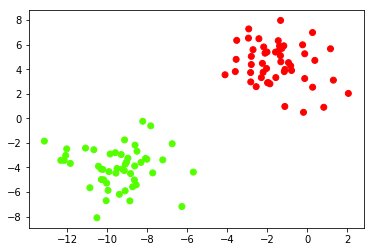

In [4]:
%matplotlib inline 
#Remember you don't need to use the previous line if you are working in Spyder
import pylab as plt
plt.prism()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Now we need to import the `LogisticRegression` class in scikit-learn that will allow us to build a logistic regression model.

In [5]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()

As usual, we need to split the dataset into a training set and a test set.

In [6]:
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

# Alternatively:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

To get an idea of how hard the task is, let us visualize the data again, this time only labeling the training points (filled circles). The test points are plottet as black triangles. You can probably easily determine to which class most of the test points belong to, but if you increase the value of the `cluster_std` parameter in the `make_blobs` function, the problem will become harder to separate and not so obvious.

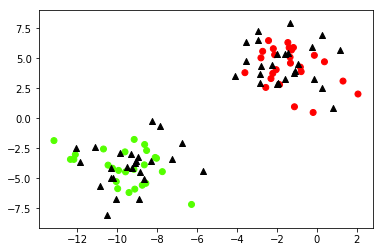

In [7]:
plt.prism()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='black', marker='^')

Classifying most of the test points (black triangles) is relatively easy. Just remember that we are working with a simplified data set for illustration purposes only. Real-life data is usually much harder to classify  by a human. Among other reasons, in high dimensional data sets, it is unfeasible for a human to look at the data and identify patterns since we cannot visualize more than 3 dimensions. For those problems (where humans are hopeless at classifying the data), the same computational techniques that we learn here, still provide good performance.

Let's fit now the logistic regression model to the training data. Keep in mind that in the next line of code, the `logRegModel` object is going to estimate the optimal values of the parameters $\theta_0$, $\theta_1$ and $\theta_2$ that minimize the cost function $J(\theta)$ as illustrated  in the lecture. 
\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}

In [8]:
logRegModel.fit(X_train, y_train)

C:\Users\drozado\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

That's it! the optimal parameters $\theta_0$, $\theta_1$, and $\theta_2$, that minimize the cost function  $J(\theta)$ on the training data $X_{train}$ have been found. You can check $\theta_0$, $\theta_1$, and $\theta_2$ yourself. Recall that $\theta_0$ is referred to as the intercept but the interpretation of its role in the model is slightly different than in linear regression.

In [9]:
print(logRegModel.intercept_) #theta_0
print(logRegModel.coef_) #theta_1 and #theta_2

[-0.56208263]
[[-0.2546676 -1.1841129]]


Keep in mind that in a 2 dimensional problem, The 2 coefficients $\theta_1$, and $\theta_2$ define the decision boundary line that divides the plane in 2 parts (the 2 classes being predicted) with one class lying always on one side of the line and the other class lying on the other side. Remember that in higher dimensional spaces, the boundary will be defined by a Hyperplane instead of a line.

Now, we take a look at how logistic regression did on the training set. We do this by now setting colors on the training data using the class predicted by the logistic regression model.

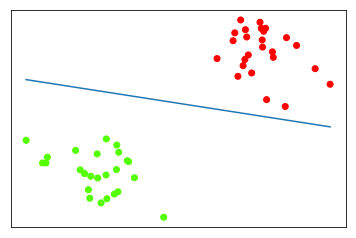

In [10]:
import numpy as np
def plot_decision_boundary(clf, X):
    w = clf.coef_.ravel()
    a = -w[0] / w[1]
    xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
    yy = a * xx - clf.intercept_ / w[1]
    plt.plot(xx, yy)
    plt.xticks(())
    plt.yticks(())
y_pred_train = logRegModel.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
plot_decision_boundary(logRegModel, X)

That looks pretty good. It is not always that easy to inspect the result visually,
so we can also use the logistic regression object to calculate an accuracy score for us, i.e. to quantify how well our model is doing on the training data:

In [11]:
print("Accuracy on training set:", logRegModel.score(X_train, y_train))

Accuracy on training set: 1.0


1.0 means an accuracy of 100%!

The performance of a model on the training data is not a good estimate of the generalization ability of the model (i.e. how the model performs on unseen data). Recall that the model estimated  $\theta_0$, $\theta_1$ and $\theta_2$ using the data contained in $X_{train}$. As a rule of thumb, you should never report the accuracy of a model on the training data. Once again, such number does not indicate the generalization ability of the model, but rather the ability of the model to remember the correct classification of the training data (recall that the training data contains the features $X$ and the targets/labels $y$). A better estimation of the generalization ability of a model is its performance on data it has never seen before. Therefore, let's look at how the logistic regression model performs on the test data, which was not used on the fitting of the model (training).

Accuracy on test set: 1.0


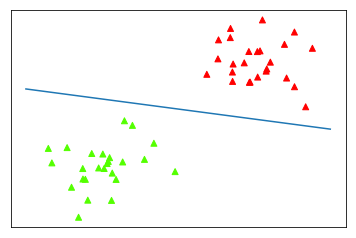

In [12]:
y_pred_test = logRegModel.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, marker='^')
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
plot_decision_boundary(logRegModel, X)
print("Accuracy on test set:", logRegModel.score(X_test, y_test))

Also perfect accuracy! Since this time we were using the test data, now you can be very confident that your estimated logistic regression model will generalize well (i.e. perform well on additional unseen data). Once again, keep in mind that we have been dealing with an extremely simple problem that a human would very easily solve. Higher dimensional data sets are more pathological. Even though this problem was extremely easy, I hope it has served the purpose of illustrating the logistic regression method via visualizations. 

### Exercise

Rerun the previous example by regenerating the artificial data blobs. This time though, make the separation of their data much harder by making the parameter `cluster_std` equals to 8 in the `make_blobs` function. Can you still manually determine the class of every data point? Can logistic regression do it?

MNIST DIGITS
-------------
Let's now move to a much harder (but more realistic too) type of problem, one which is used for instance by mail delivery companies all over the world to automatically recognize ZIP codes in mail letters and route them towards their proper destination.

The MNIST (http://yann.lecun.com/exdb/mnist/) data set is a collection of scanned handwritten digits. The original black and white (bilevel) images from MNIST were size normalized to fit in a 28x28 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centered in a 28x28 plane by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 plane. The dataset contains a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from MNIST. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting data.

![](./images/mnist.gif)

This dataset is a bit more exciting than the previous one since it is much higher dimensional (28 horizontal pixels $\times$ 28 vertical pixels = 784 dimensions) and not as easy to separate as the previous example. The data is located in the I drive at [I:\COURSES\ITP\BITY3\IN726-dsmi-data](I:\COURSES\ITP\BITY3\IN726-dsmi-data). Copy the file `mnist` to the folder where this practical is located and execute the following cell. 

In [52]:
import numpy as np
import scipy.io
mat = scipy.io.loadmat("./mnist")
X_digits = mat['data'].T
y_digits = mat['label'][0].T

In [40]:
print(mat['label'][0])

[0. 0. 0. ... 9. 9. 9.]


Notice how the dataset looks like:

- There are 70,000 examples (data points) 

- Thus, $X$ has 70,000 rows, 

- Each data  point (example) is an (image representing a number) 

- Each image contains 784 pixels (dimensions) 

- Each image is a single row in $X$ as a result of flattening the 2D images of 28x28 pixels into a 1D vector with 784 elements 

![](./images/flatten.png)

![](./images/flatten2.png)


- There are 10 classes of data, digits from 0 to 9. Therefore, the target vector $y$ can have a value between 0 and 9 representing the number contained in the corresponding row in $X$

Explore the data structure contained in the `mnist` object using Spyder's `Variable explorer` tab and make sure you become familiar with it. 

In [41]:
print("X_digits.shape:", X_digits.shape) #The dimensions of X
print("Unique entries of y_digits:", np.unique(y_digits)) #The classes in y

X_digits.shape: (70000, 784)
Unique entries of y_digits: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Let's visualize the 1st row of the data matrix $X$:

Class of first element in our data set:  0.0
Data shape of first row of X:  (784,)
First row of X: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 159, 253, 159, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 238, 252, 252, 252, 237, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 227, 253, 252, 239, 233, 252, 57, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 60, 224, 252, 253, 252, 202, 84, 252, 253, 122, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 163, 252, 252, 252, 253, 252, 252, 96, 189, 253, 167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 51, 238, 253, 253, 190, 114, 253, 228, 47

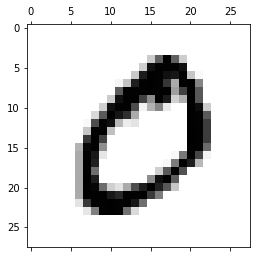

In [42]:
import pylab as plt
print("Class of first element in our data set: ", y_digits[0])
plt.rc("image", cmap="binary")
#print("Data contained in first row of X:", X_digits[0])
print("Data shape of first row of X: ", X_digits[0].shape)
print("First row of X: " +str(list(X_digits[0])))
print("Transforming the first row of X into a 2 dimensional representation:")
plt.matshow(X_digits[0].reshape(28, 28)) # we reshape the 784 elements row into a 28x28 matrix
ax = plt.gca()
ax.grid(False)

We could try to learn all ten classes of digits using logistic regression, but let's keep it simple and try to discriminate just two classes for the moment. We will use the classes 0 and 1, corresponding to the digits 0 and 1 respectively. To create a dataset only consisting of the classes 0 and 1, we need a new numpy trick. We can not only slice our data using ranges, like ``X[5:10]``, we can also select elements using conditions, like so:

In [43]:
zeros = X_digits[y_digits==0]  # select all the rows of X where y (target value) is zero (i.e. the zero digits)
ones = X_digits[y_digits==1]   # select all the rows of X where y is one (i.e. the one digits)
print("zeros.shape: ", zeros.shape) # print the number of instances of class 0
print("ones.shape: ", ones.shape) # print the number of instances of class 1

zeros.shape:  (6903, 784)
ones.shape:  (7877, 784)


In [44]:
y_digits

array([0., 0., 0., ..., 9., 9., 9.])

So we have, 6903 images of the number 0 and 7877 images of the number 1. Lets have a quick look to make sure we did it right.

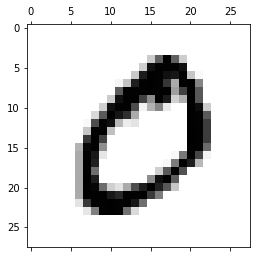

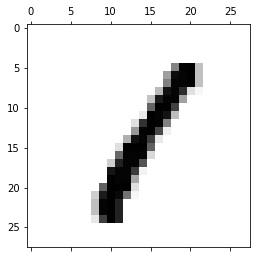

In [45]:
plt.rc("image", cmap="binary")
plt.matshow(zeros[0].reshape(28, 28)) 
ax = plt.gca()
ax.grid(False)
plt.matshow(ones[0].reshape(28, 28)) 
ax = plt.gca()
ax.grid(False)

You can try to modify the index of the `zeros` and `ones` array to print other instances of the class zeros. 

### Rearranging the data

Now, let's generate some new data set. For the training labels $y_{train}$, we write as many 0's as the ``zeros`` array is long, the same for ``ones``.

In [46]:
X_new = np.vstack([zeros, ones])  # this "stacks" zeros and ones vertically
print("X_new.shape: ", X_new.shape)
y_new = np.hstack([np.repeat(0, zeros.shape[0]), np.repeat(1, ones.shape[0])])
print("y_new.shape: ", y_new.shape)
print("y_new: ", y_new)

X_new.shape:  (14780, 784)
y_new.shape:  (14780,)
y_new:  [0 0 0 ... 1 1 1]


Now we shuffle them around and create a training and test dataset.

In [47]:
from sklearn.utils import shuffle
X_new, y_new = shuffle(X_new, y_new)
X_mnist_train = X_new[:5000]
y_mnist_train = y_new[:5000]
X_mnist_test = X_new[5000:]
y_mnist_test = y_new[5000:]

Finally, let us learn a logistic regression model.

In [49]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(solver='lbfgs')
logRegModel.fit(X_mnist_train, y_mnist_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Let's try to visualize the coefficients of the fitted model. Notice that now we are dealing with a model with $\Large 785$ $\theta_n$ parameters: $28 \times 28$ pixels + $\theta_0$. In order to visualize $\theta_1, \theta_2, ... \theta_{784}$ we will plot those coefficients in a two-dimensional matrix of dimensions 28 x 28. Sort of like the images of the digits. We can see that the middle of that matrix, (i.e. the coefficients around $\theta_{392}$) are quite dark, corresponding to  high positive values for images representing the digit 1. Around it is a lighter circle, corresponding to the more noisy position of the 0 instances.

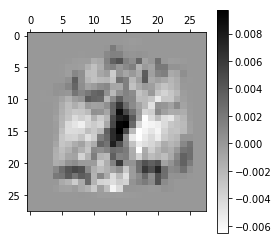

In [50]:
plt.matshow(logRegModel.coef_.reshape(28, 28))
plt.colorbar()
ax = plt.gca()
ax.grid(False)

Finally, Let's estimate the accuracy of the model we have just computed on the training and the test sets. Recall that the only relevant number here is the accuracy of the `logRegModel` on the test set, which estimates the generalization ability of the `logRegModel` model. That is, how well is `logRegModel` likely to perform in unseen data (i.e. new digit images we might provide to the model in the future for classification purposes that the model never saw during training). 

In [51]:
print("Accuracy training set:", logRegModel.score(X_mnist_train, y_mnist_train))
print("Accuracy test set:", logRegModel.score(X_mnist_test, y_mnist_test))

Accuracy training set: 1.0
Accuracy test set: 0.9977505112474437


Congratulations! you have created a system that is able to automatically separate hand-written digits (1's and 0's) with a generalization accuracy of 99.8%.

Try to separate some other digit classes from MNIST. Which ones are hard, which are not? Can you guess the reason why?

Exercise
=================================

The provided file `glass.csv` contains predictors about Refractive index and chemical components: (Sodium (na), Magnesium (mg), 
Aluminum (al), Silicon (si), Potassium (k), Calcium(ca), Barium (ba) and Iron (fe) of 2 types of glasses:
- 0: industrial glass used for instance for building windows 
- 1: household glass found inside houses such as for instance containers, tableware or headlamps

Your task is to create a logistic regression model that is able to predict the type of glass (household class or industrial glass) using the available predictors. I suggest the following workflow:

1. Load the data from the `glass.csv` using pandas `read_csv` function
2. Place the predictors ('ri','na','mg','al','si','k','ca','ba','fe') in a feature matrix variable $X$ (exclude the index, 'id', column)
3. Place the class labels/targets (named 'household' in `glass.csv`) in a vector $y$
4. Shuffle the data since the data in the `glass.csv` file is ordered by class
5. Split the data into a 75% training set and a 25% test set
6. Fit a logistic regression model to the train set
7. Estimate the classification accuracy of your fitted model using the test set